In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

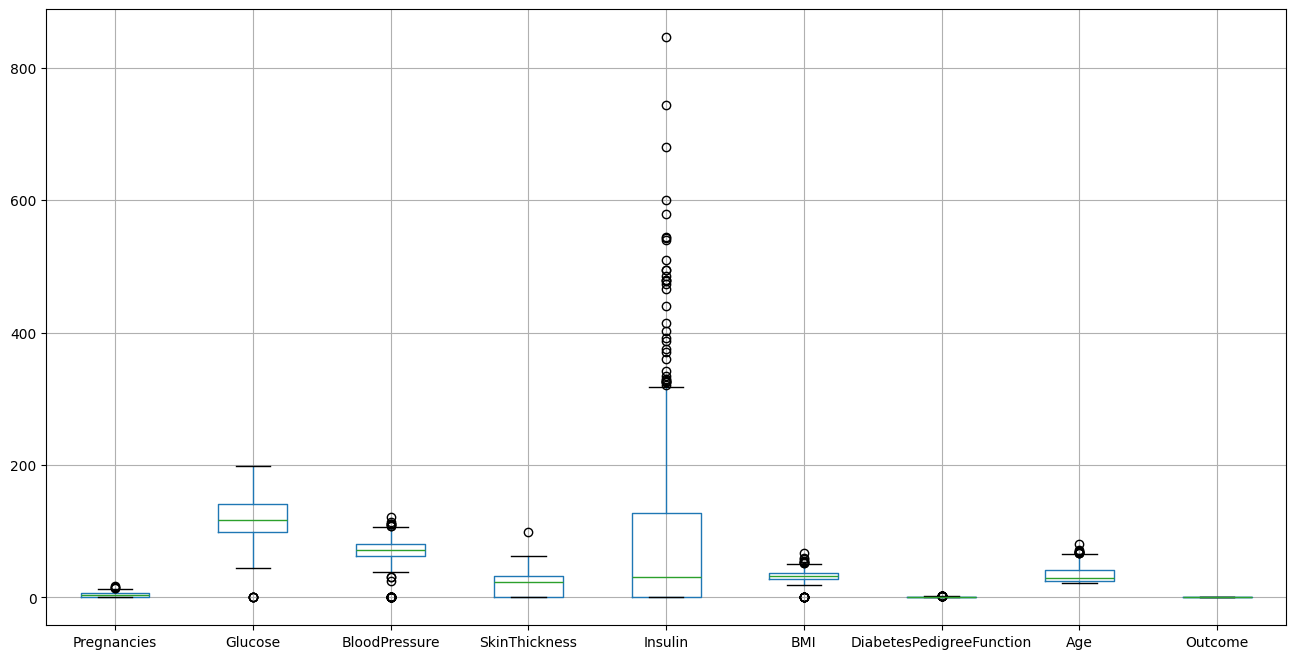

In [6]:
plt.figure(figsize=(16, 8))
data.boxplot()
plt.show()


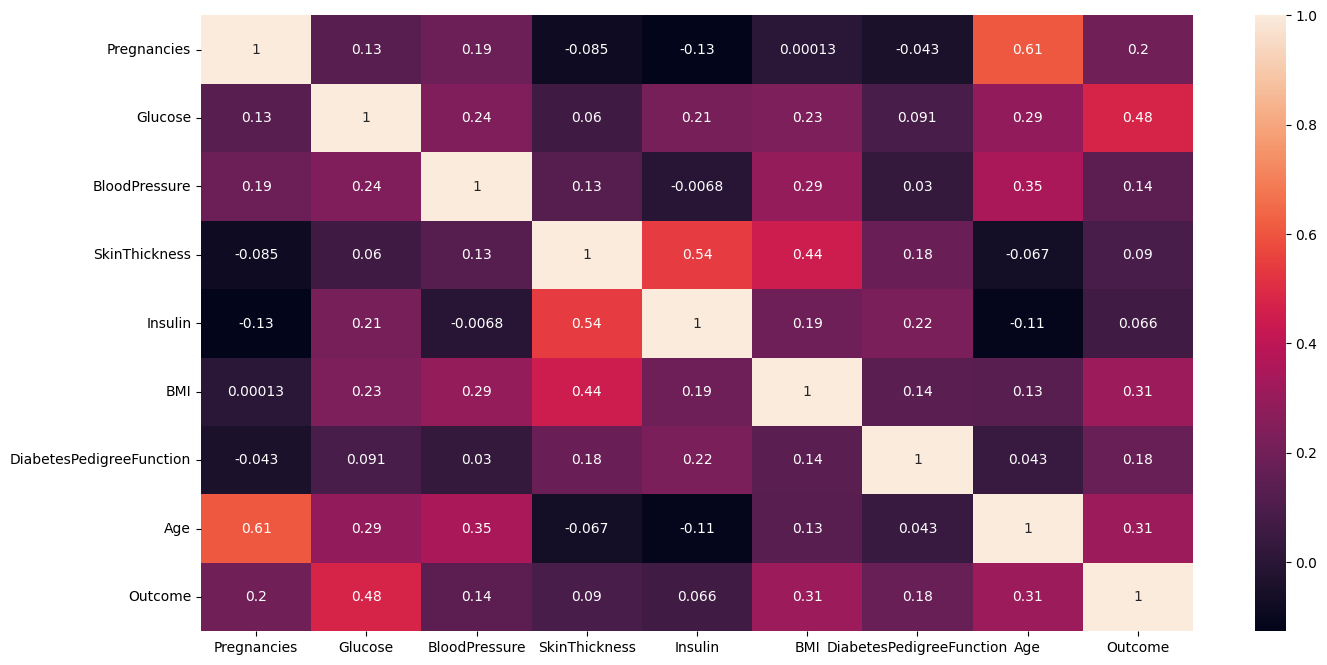

In [7]:
# spearman
plt.figure(figsize=(16, 8))
sns.heatmap(data.corr(method='spearman'), annot=True)
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

In [10]:
X = data.drop(['Outcome'], axis=1)
Y = data['Outcome']

In [11]:
rescalarX = StandardScaler().fit_transform(X)
dataX = pd.DataFrame(data=rescalarX, columns=X.columns)
dataX.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [12]:
#Mantenemos el clasificador Naive Bayes y agregamos el de Random Forest

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.neighbors import KNeighborsClassifier #K-nn

In [13]:
X_train, X_test, Y_train, Y_Test = train_test_split(dataX, Y,
                                                    random_state = 22, test_size=0.2)

In [14]:
X_train_orig = X_train
X_test_orig = X_test

In [48]:
models1 = []
# Guardamos el modelo de Naive Bayes en models
models1.append(("Naive Bayes", GaussianNB()))

In [49]:
# Quiero agregar los K-NN primero 30
for i in range(1, 31):
    models1.append((f"K-NN {i}", KNeighborsClassifier(n_neighbors=i)))

In [50]:
len(models1)

31

# EVALUACION DEL MODELO

Naive Bayes 0.7587519830777366
K-NN 1 0.690560549973559
K-NN 2 0.7148598625066103
K-NN 3 0.7295081967213114
K-NN 4 0.723188789000529
K-NN 5 0.7345848757271285
K-NN 6 0.728106821787414
K-NN 7 0.7377842411422528
K-NN 8 0.7280539397144368
K-NN 9 0.7361184558434691
K-NN 10 0.7362506610259122
K-NN 11 0.7395029085140138
K-NN 12 0.7314119513484929
K-NN 13 0.7508196721311474
K-NN 14 0.7378371232152301
K-NN 15 0.7605764145954521
K-NN 16 0.7605764145954522
K-NN 17 0.7588577472236911
K-NN 18 0.7556054997355895
K-NN 19 0.7637493389740877
K-NN 20 0.7523796932839767
K-NN 21 0.7507403490216816
K-NN 22 0.7507403490216816
K-NN 23 0.7507403490216816
K-NN 24 0.7507932310946589
K-NN 25 0.7540454785827604
K-NN 26 0.7427022739291379
K-NN 27 0.7574034902168165
K-NN 28 0.7476203067160233
K-NN 29 0.7540983606557378
K-NN 30 0.749206768905341


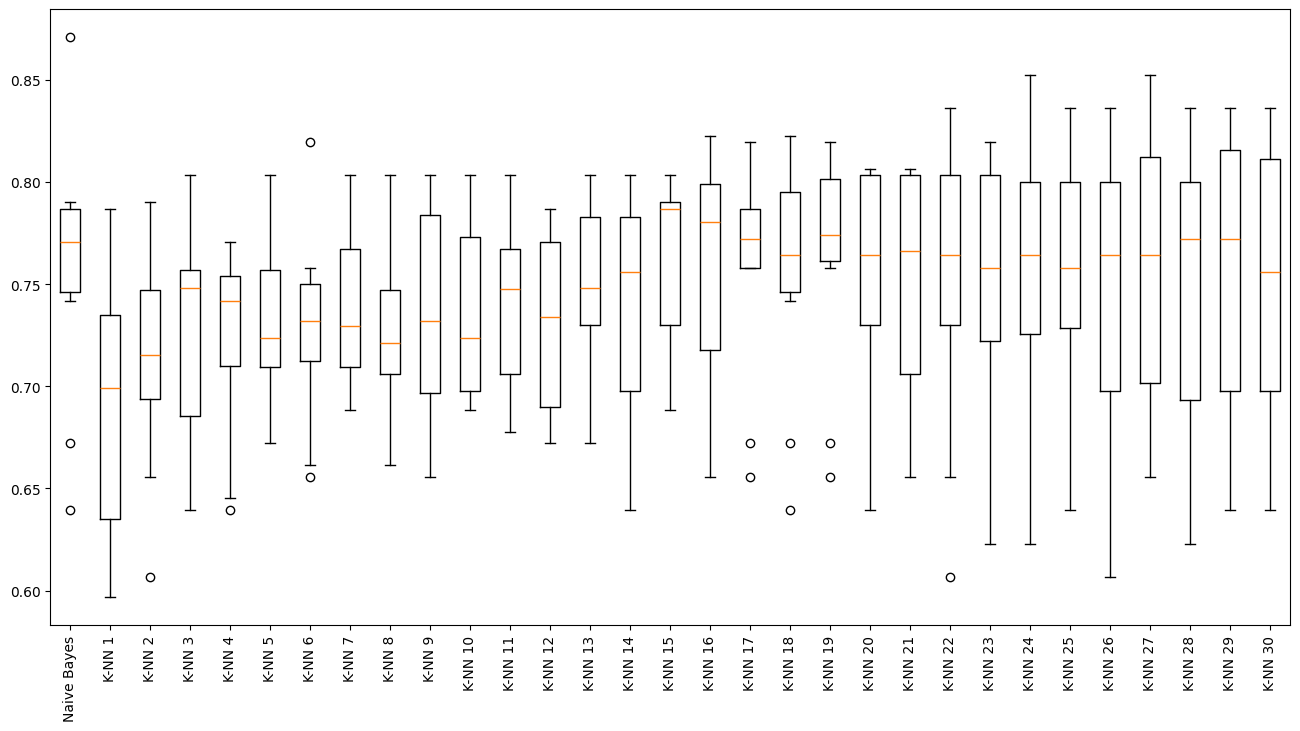

In [52]:
#Ejecutando la clasificacion
results = []
names =[]

for name, model in models1:
  kfold = KFold(n_splits=10, random_state = 42, shuffle=True)
  cv_result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring= 'accuracy')
  names.append(name)
  results.append(cv_result)

i = len(names)-1

for i in range(len(names)):
    print(names[i], results[i].mean())

#Graficando los resultados
plt.figure(figsize=(16, 8))
plt.boxplot(results)
plt.xticks(range(1, len(names)+1), names, rotation=90)
plt.show()


K=1, AUC=0.7078
K=2, AUC=0.7311
K=3, AUC=0.7290
K=4, AUC=0.7318
K=5, AUC=0.7470
K=6, AUC=0.7645
K=7, AUC=0.7536
K=8, AUC=0.7567
K=9, AUC=0.7608
K=10, AUC=0.7608
K=11, AUC=0.7658
K=12, AUC=0.7669
K=13, AUC=0.7720
K=14, AUC=0.7747
K=15, AUC=0.7746
K=16, AUC=0.7742
K=17, AUC=0.7689
K=18, AUC=0.7720
K=19, AUC=0.7803
K=20, AUC=0.7758
K=21, AUC=0.7683
K=22, AUC=0.7704
K=23, AUC=0.7670
K=24, AUC=0.7677
K=25, AUC=0.7695
K=26, AUC=0.7737
K=27, AUC=0.7779
K=28, AUC=0.7823
K=29, AUC=0.7807
K=30, AUC=0.7828


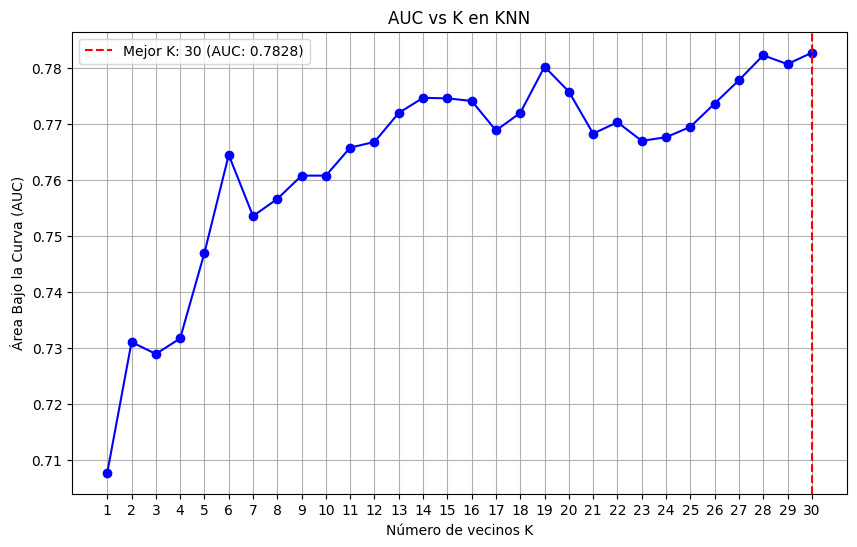


El mejor K es 30 con un AUC de 0.7828.


In [57]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
def optimal_k_knn(X_train, y_train, X_test, y_test, max_k=30):
    auc_scores = []

    # Probar diferentes valores de K
    for k in range(1, max_k + 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_proba = knn.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
        auc = roc_auc_score(y_test, y_proba)
        auc_scores.append(auc)
        print(f"K={k}, AUC={auc:.4f}")

    # Visualización de los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), auc_scores, marker='o', linestyle='-', color='b')
    plt.title('AUC vs K en KNN')
    plt.xlabel('Número de vecinos K')
    plt.ylabel('Área Bajo la Curva (AUC)')
    plt.xticks(np.arange(1, max_k + 1, step=1))
    plt.grid()
    
    # Mejor K
    best_k = np.argmax(auc_scores) + 1
    best_auc = max(auc_scores)
    plt.axvline(x=best_k, color='r', linestyle='--', label=f'Mejor K: {best_k} (AUC: {best_auc:.4f})')
    plt.legend()
    plt.show()

    return best_k, best_auc
best_k, best_auc = optimal_k_knn(X_train, Y_train, X_test, Y_Test)
print(f'\nEl mejor K es {best_k} con un AUC de {best_auc:.4f}.')

In [58]:
#Evaluacion de los resultados

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


Confusion matrix, without normalization
[[87 13]
 [32 22]]
Normalized confusion matrix
[[0.87       0.13      ]
 [0.59259259 0.40740741]]


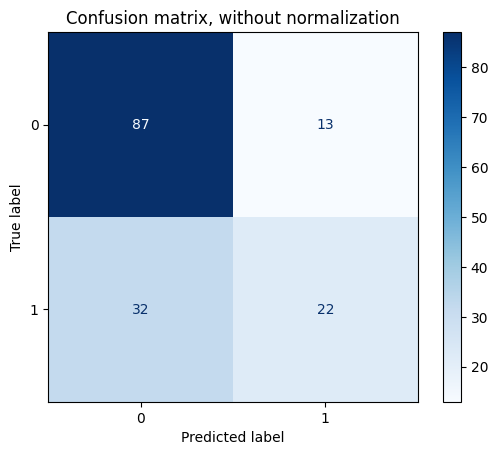

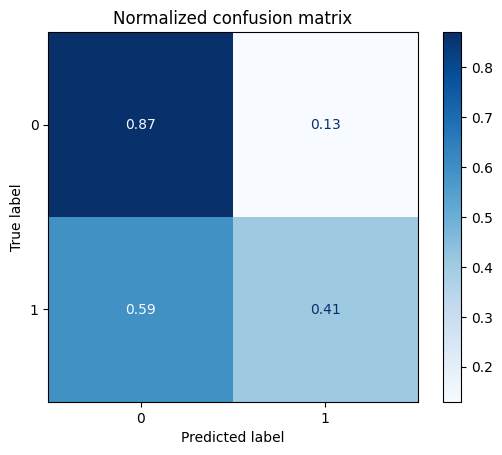

Confusion matrix, without normalization
[[86 14]
 [24 30]]
Normalized confusion matrix
[[0.86       0.14      ]
 [0.44444444 0.55555556]]


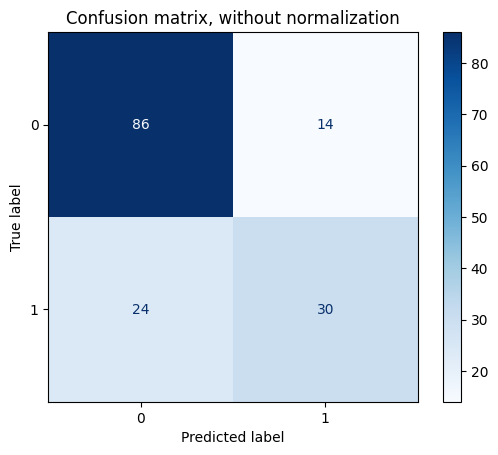

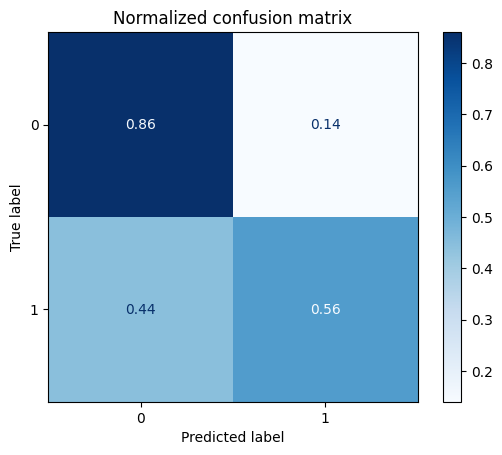

Confusion matrix, without normalization
[[92  8]
 [40 14]]
Normalized confusion matrix
[[0.92       0.08      ]
 [0.74074074 0.25925926]]


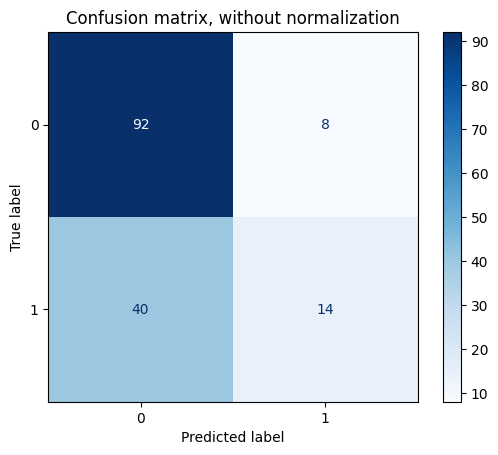

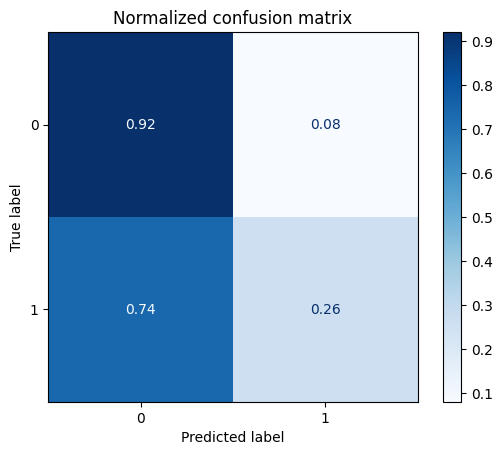

Confusion matrix, without normalization
[[87 13]
 [29 25]]
Normalized confusion matrix
[[0.87       0.13      ]
 [0.53703704 0.46296296]]


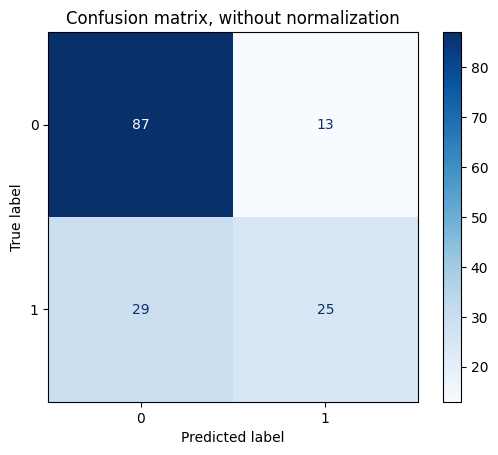

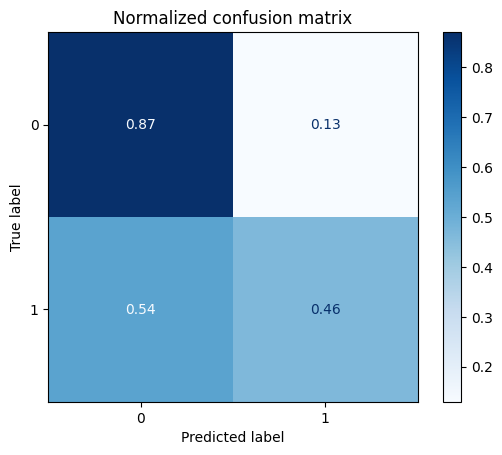

Confusion matrix, without normalization
[[91  9]
 [37 17]]
Normalized confusion matrix
[[0.91       0.09      ]
 [0.68518519 0.31481481]]


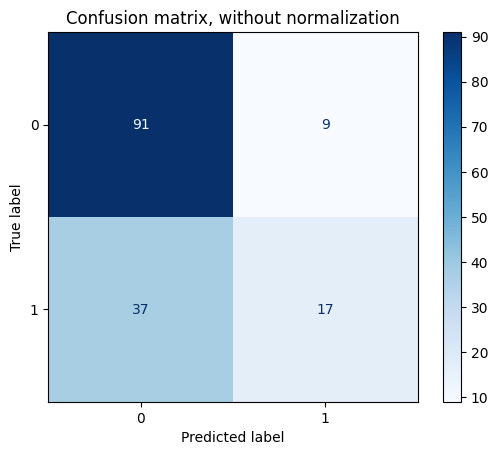

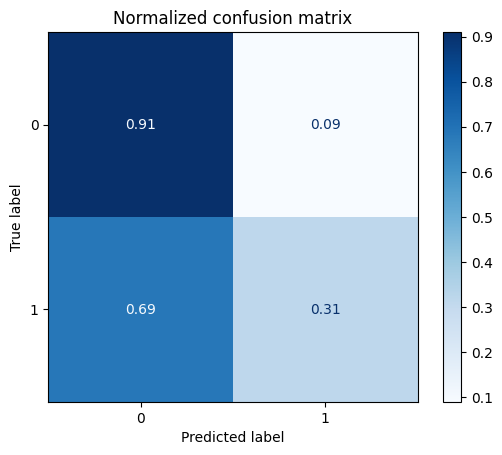

Confusion matrix, without normalization
[[88 12]
 [32 22]]
Normalized confusion matrix
[[0.88       0.12      ]
 [0.59259259 0.40740741]]


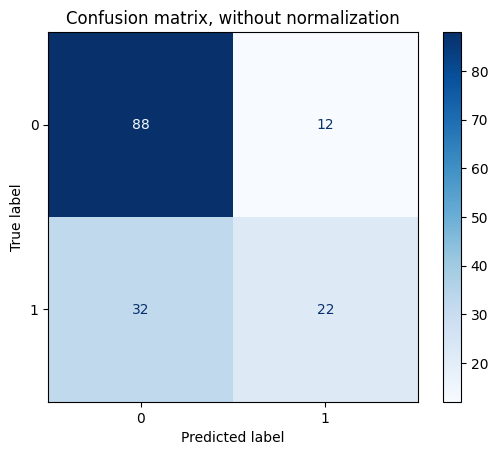

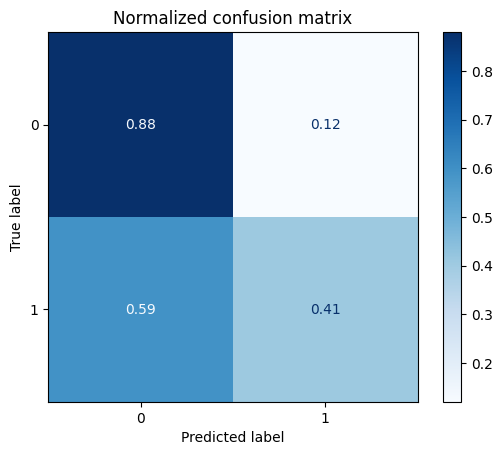

Confusion matrix, without normalization
[[88 12]
 [35 19]]
Normalized confusion matrix
[[0.88       0.12      ]
 [0.64814815 0.35185185]]


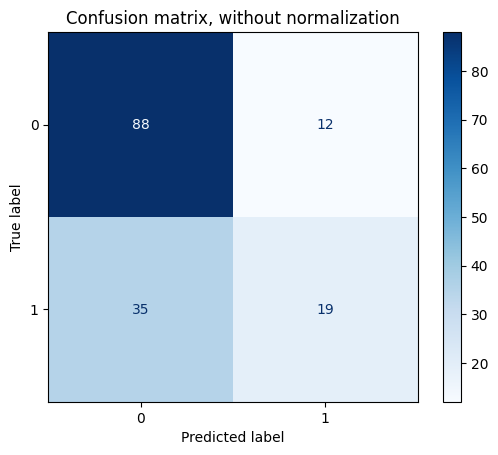

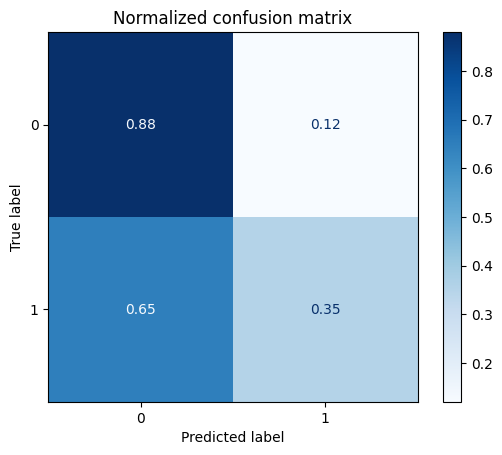

Confusion matrix, without normalization
[[88 12]
 [34 20]]
Normalized confusion matrix
[[0.88       0.12      ]
 [0.62962963 0.37037037]]


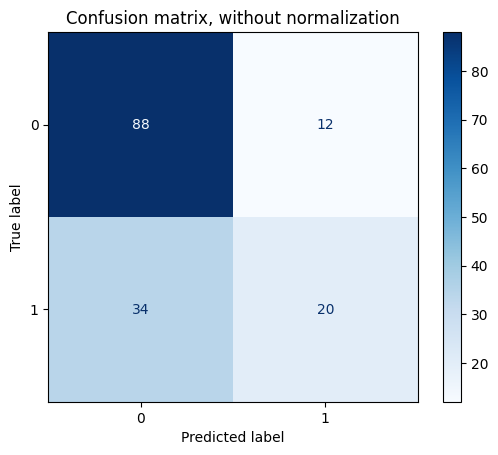

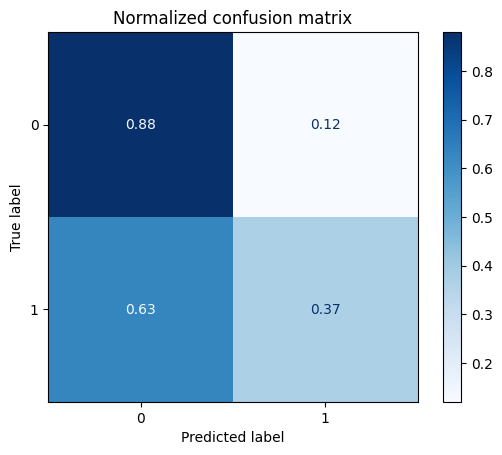

Confusion matrix, without normalization
[[91  9]
 [36 18]]
Normalized confusion matrix
[[0.91       0.09      ]
 [0.66666667 0.33333333]]


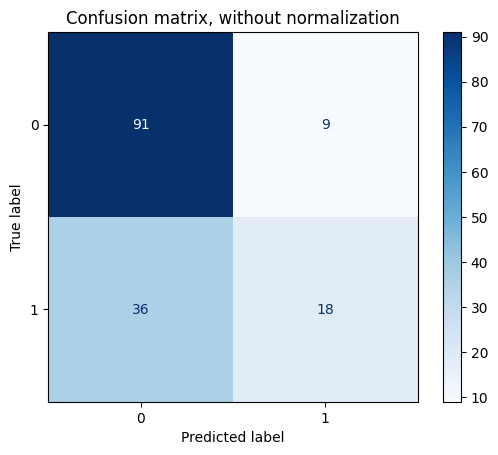

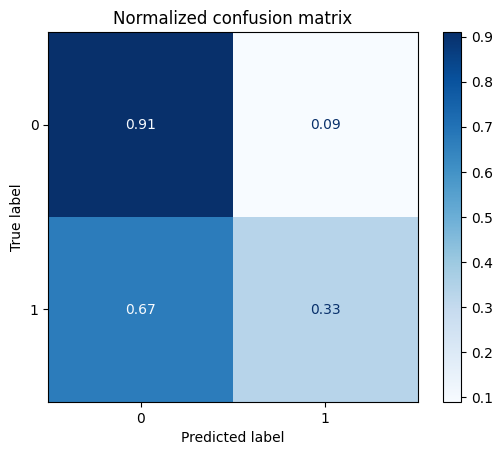

Confusion matrix, without normalization
[[88 12]
 [33 21]]
Normalized confusion matrix
[[0.88       0.12      ]
 [0.61111111 0.38888889]]


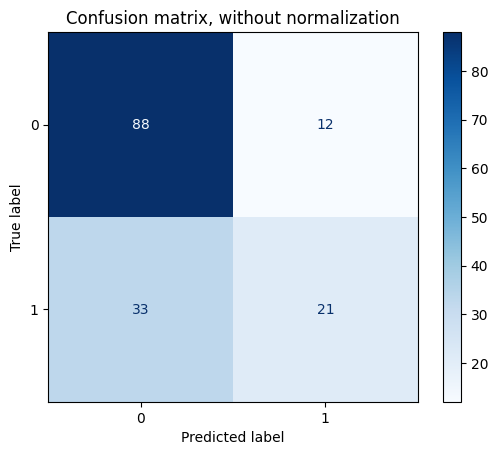

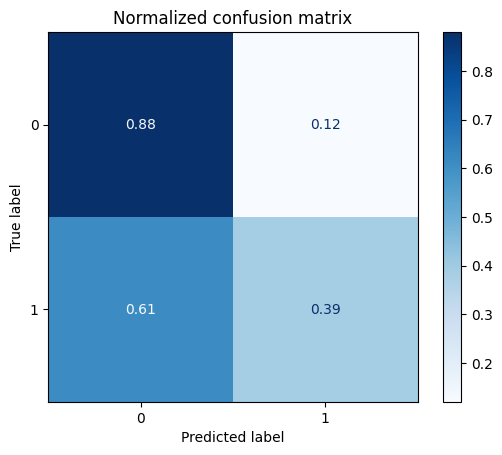

Confusion matrix, without normalization
[[90 10]
 [35 19]]
Normalized confusion matrix
[[0.9        0.1       ]
 [0.64814815 0.35185185]]


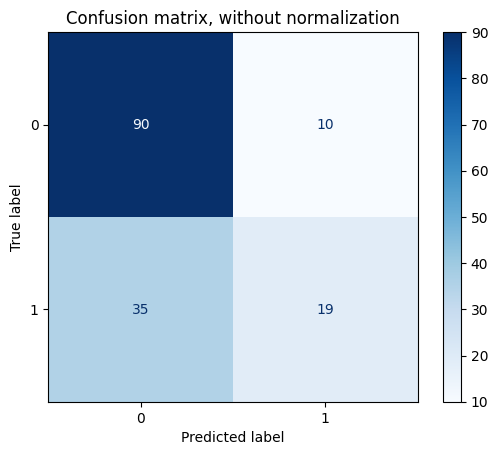

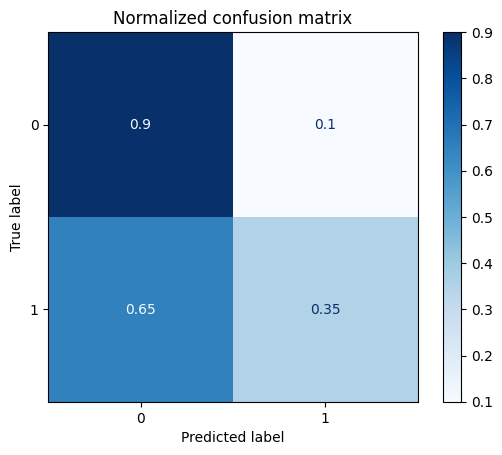

Confusion matrix, without normalization
[[89 11]
 [34 20]]
Normalized confusion matrix
[[0.89       0.11      ]
 [0.62962963 0.37037037]]


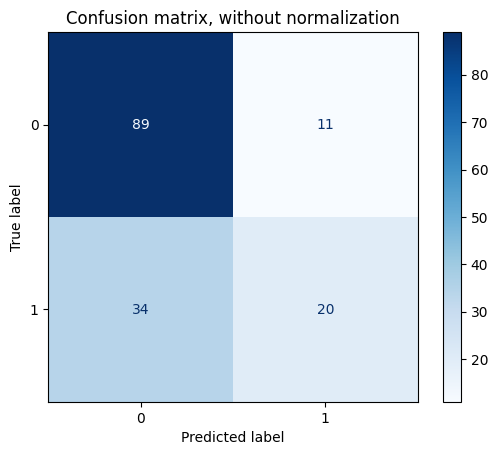

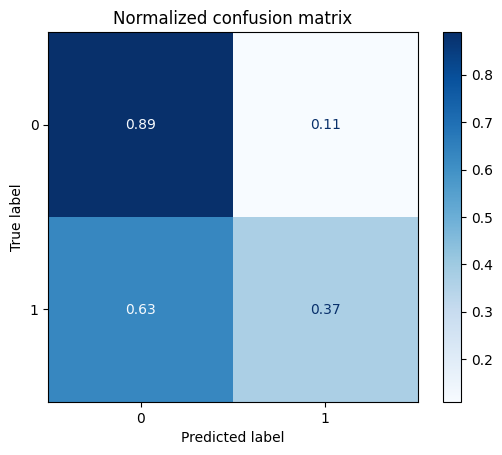

Confusion matrix, without normalization
[[91  9]
 [36 18]]
Normalized confusion matrix
[[0.91       0.09      ]
 [0.66666667 0.33333333]]


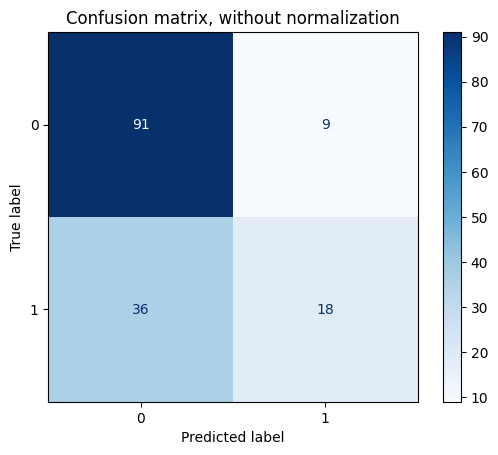

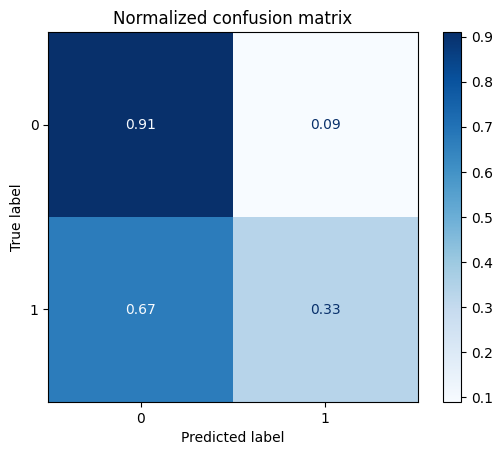

Confusion matrix, without normalization
[[90 10]
 [35 19]]
Normalized confusion matrix
[[0.9        0.1       ]
 [0.64814815 0.35185185]]


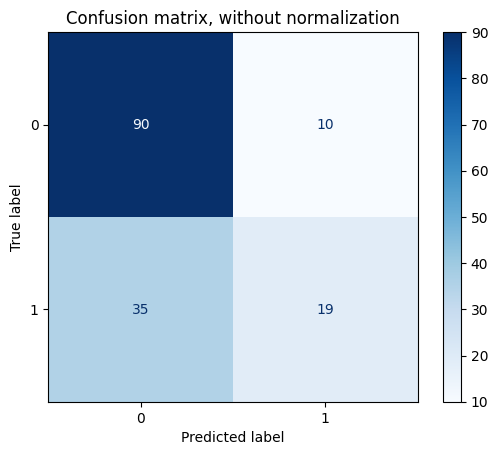

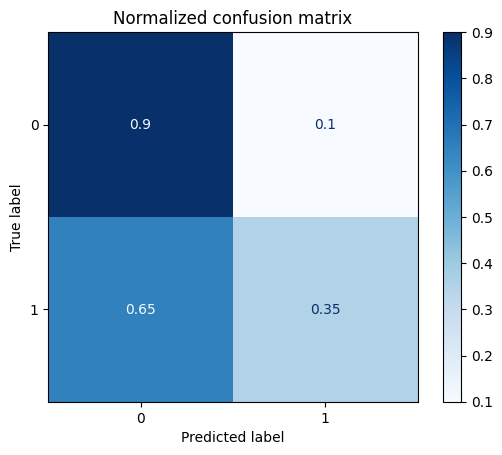

Confusion matrix, without normalization
[[90 10]
 [37 17]]
Normalized confusion matrix
[[0.9        0.1       ]
 [0.68518519 0.31481481]]


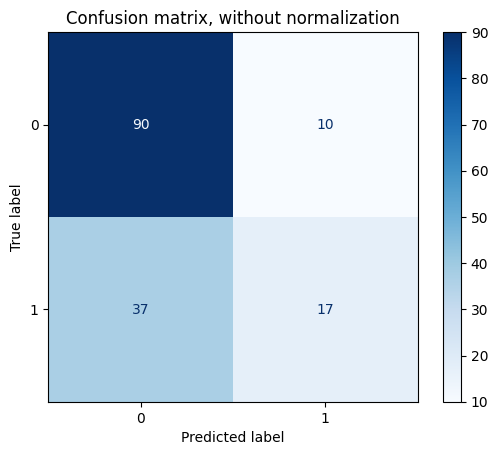

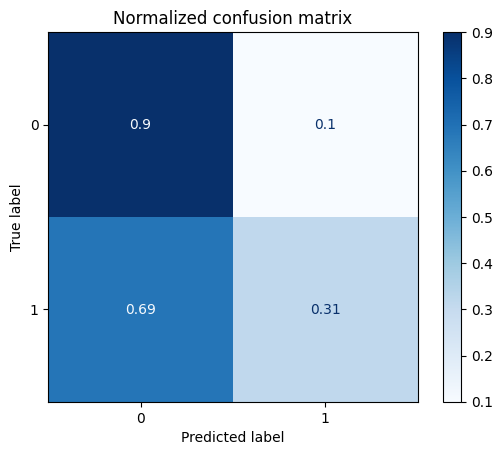

Confusion matrix, without normalization
[[90 10]
 [36 18]]
Normalized confusion matrix
[[0.9        0.1       ]
 [0.66666667 0.33333333]]


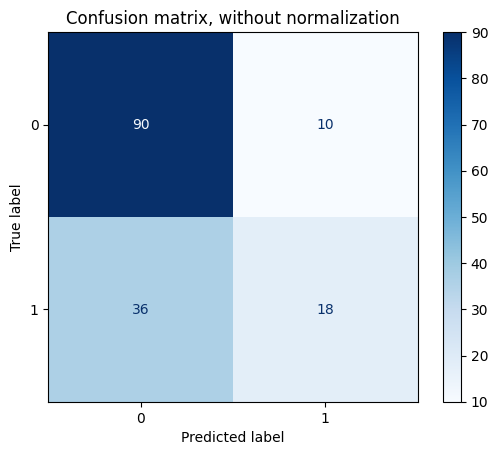

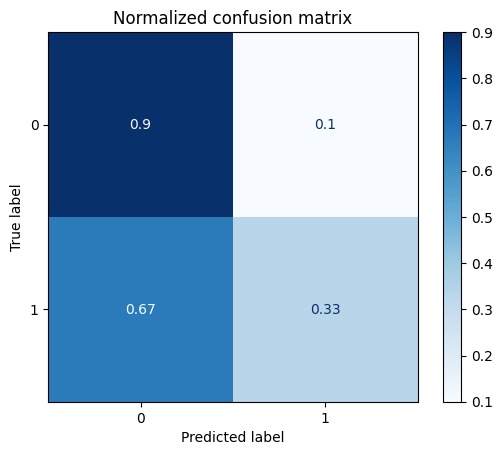

Confusion matrix, without normalization
[[92  8]
 [38 16]]
Normalized confusion matrix
[[0.92      0.08     ]
 [0.7037037 0.2962963]]


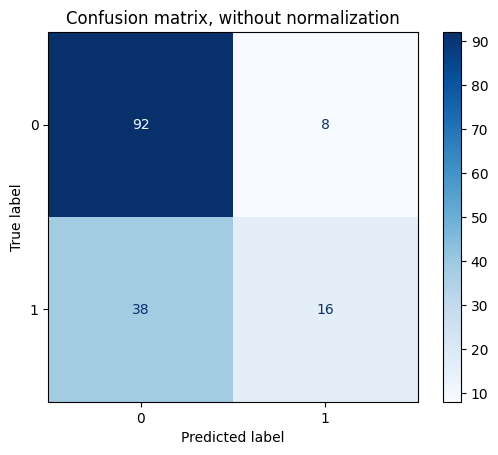

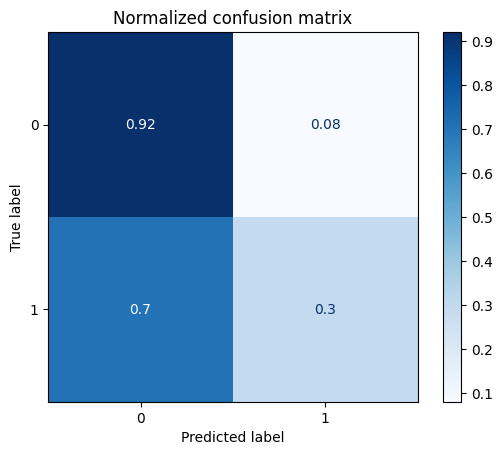

Confusion matrix, without normalization
[[91  9]
 [37 17]]
Normalized confusion matrix
[[0.91       0.09      ]
 [0.68518519 0.31481481]]


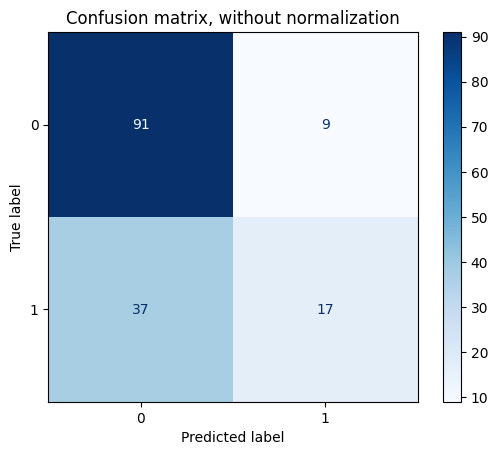

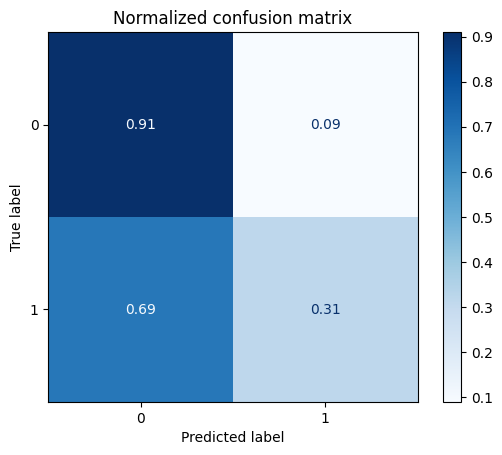

Confusion matrix, without normalization
[[92  8]
 [37 17]]
Normalized confusion matrix
[[0.92       0.08      ]
 [0.68518519 0.31481481]]


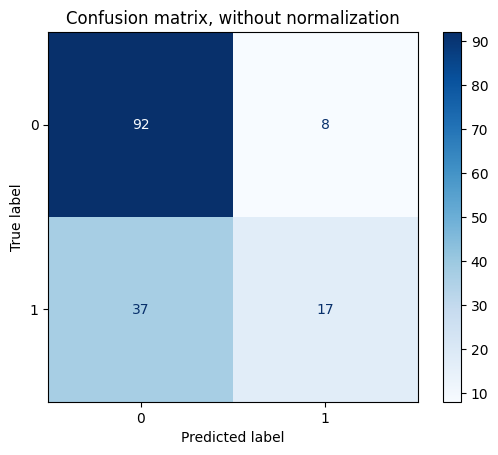

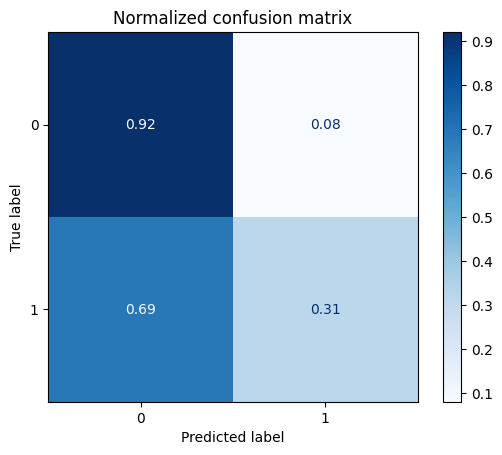

Confusion matrix, without normalization
[[90 10]
 [35 19]]
Normalized confusion matrix
[[0.9        0.1       ]
 [0.64814815 0.35185185]]


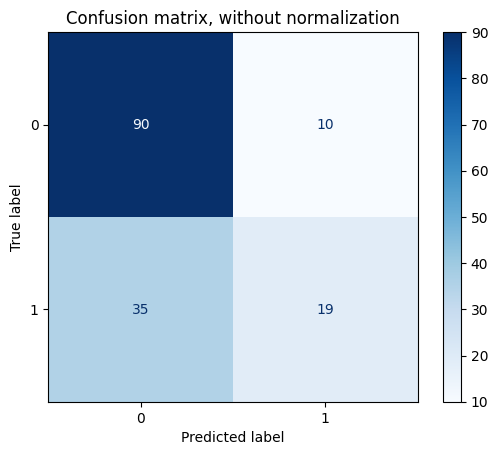

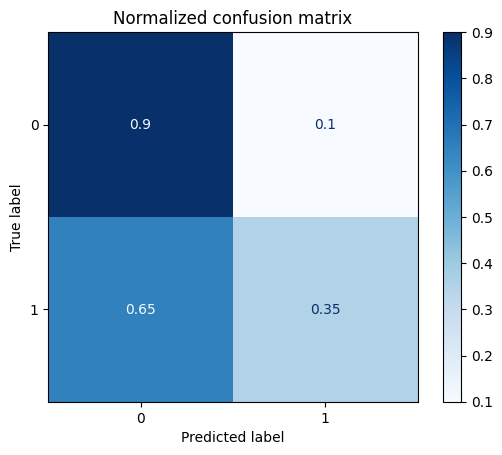

Confusion matrix, without normalization
[[94  6]
 [36 18]]
Normalized confusion matrix
[[0.94       0.06      ]
 [0.66666667 0.33333333]]


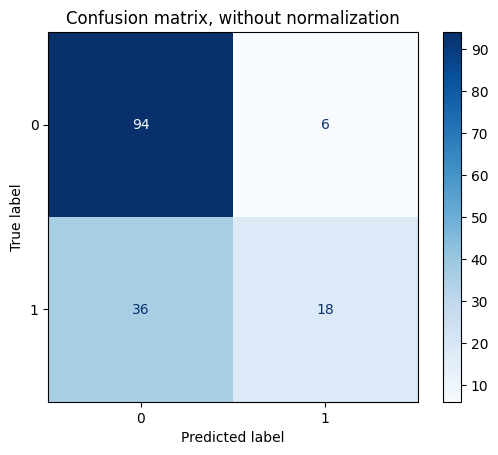

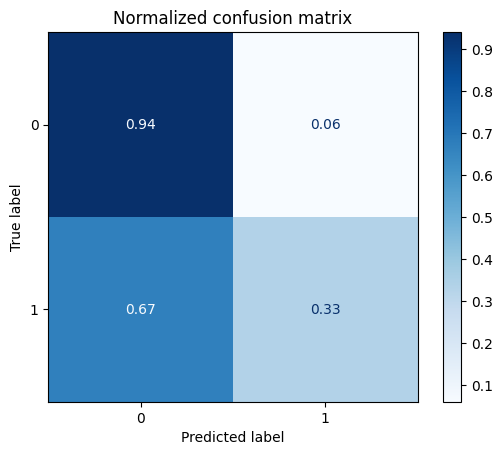

Confusion matrix, without normalization
[[91  9]
 [36 18]]
Normalized confusion matrix
[[0.91       0.09      ]
 [0.66666667 0.33333333]]


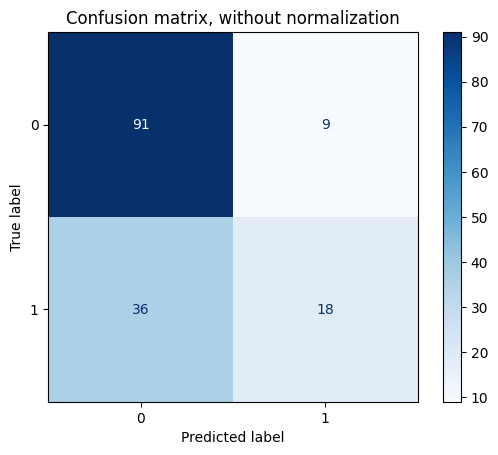

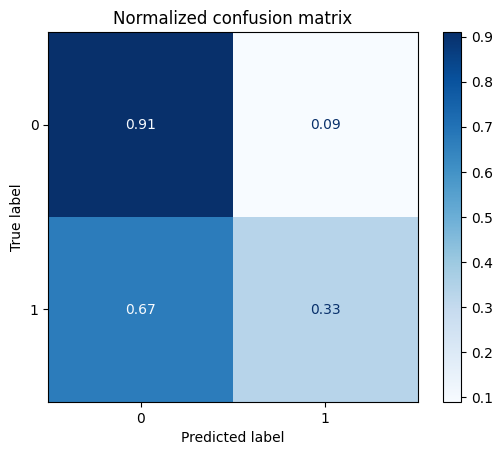

Confusion matrix, without normalization
[[93  7]
 [38 16]]
Normalized confusion matrix
[[0.93      0.07     ]
 [0.7037037 0.2962963]]


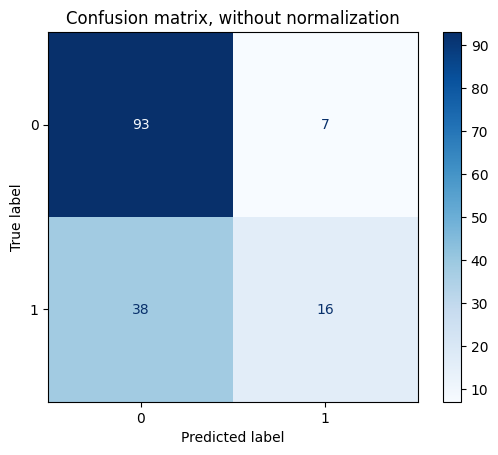

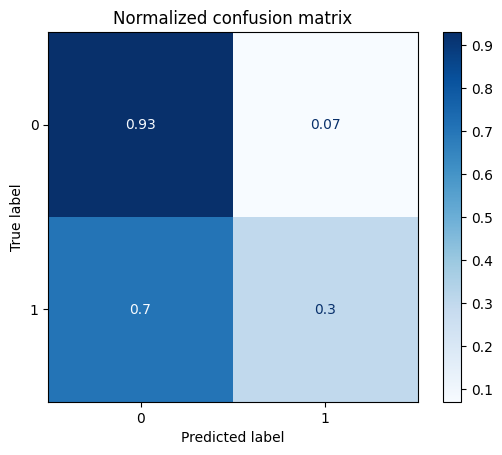

Confusion matrix, without normalization
[[92  8]
 [38 16]]
Normalized confusion matrix
[[0.92      0.08     ]
 [0.7037037 0.2962963]]


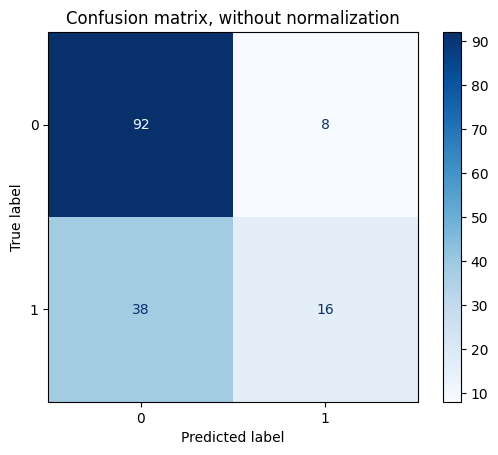

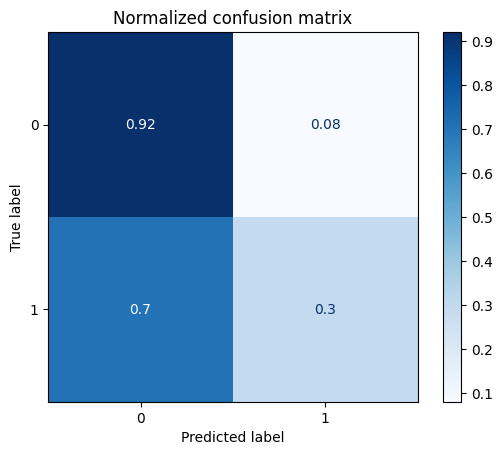

Confusion matrix, without normalization
[[94  6]
 [38 16]]
Normalized confusion matrix
[[0.94      0.06     ]
 [0.7037037 0.2962963]]


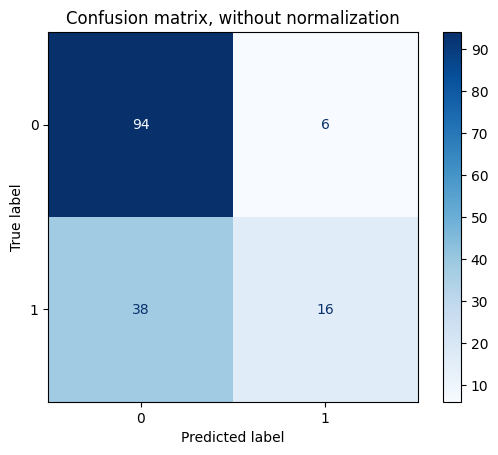

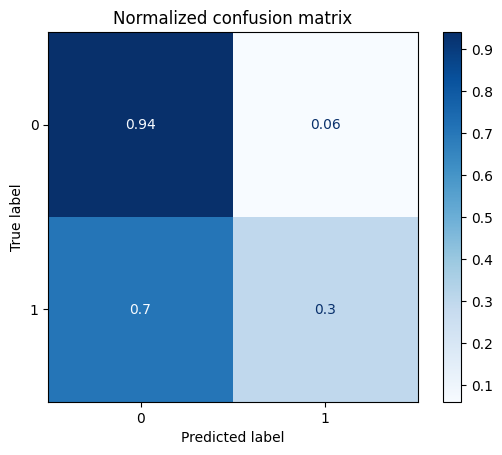

Confusion matrix, without normalization
[[92  8]
 [38 16]]
Normalized confusion matrix
[[0.92      0.08     ]
 [0.7037037 0.2962963]]


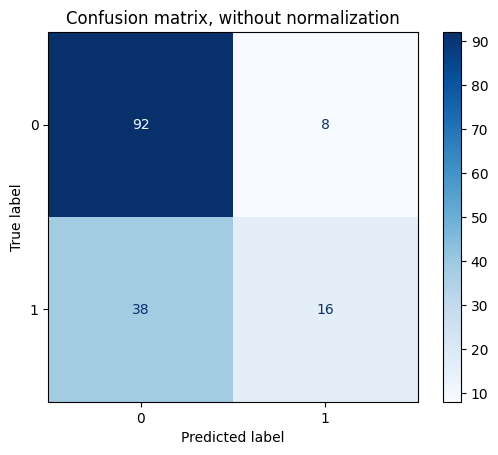

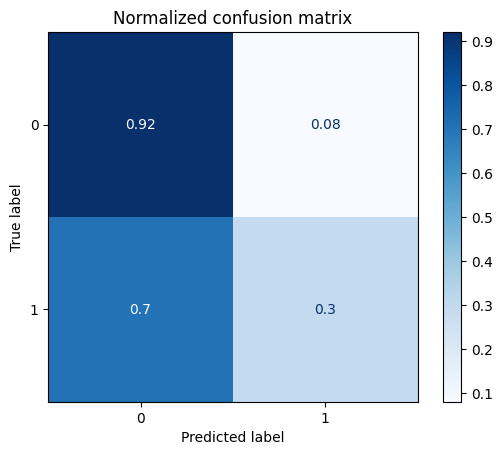

Confusion matrix, without normalization
[[95  5]
 [39 15]]
Normalized confusion matrix
[[0.95       0.05      ]
 [0.72222222 0.27777778]]


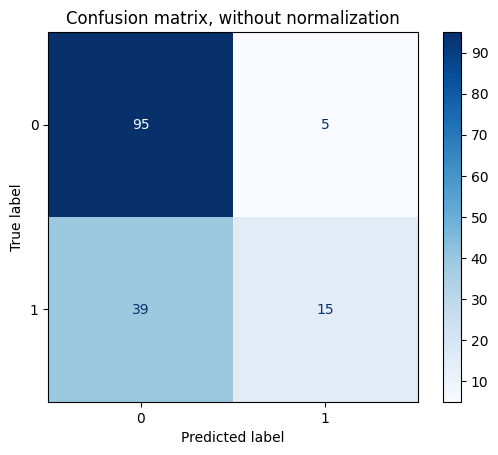

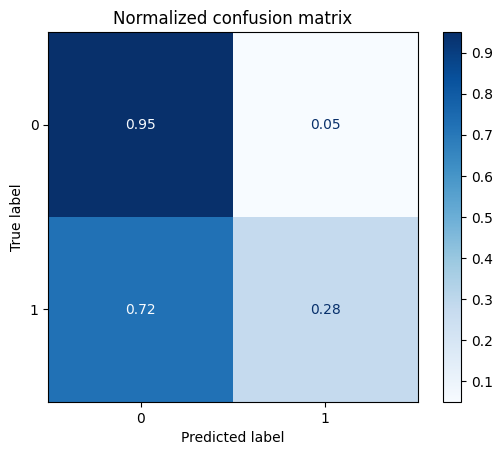

Confusion matrix, without normalization
[[92  8]
 [38 16]]
Normalized confusion matrix
[[0.92      0.08     ]
 [0.7037037 0.2962963]]


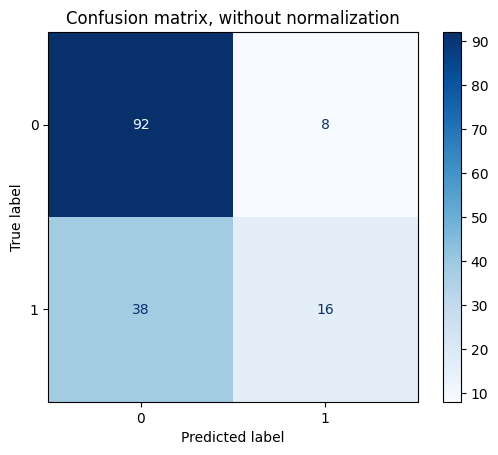

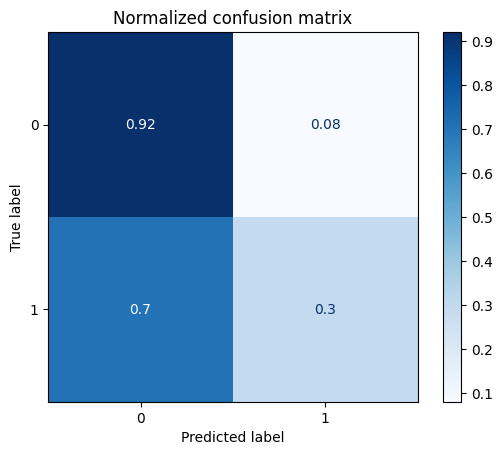

Confusion matrix, without normalization
[[96  4]
 [40 14]]
Normalized confusion matrix
[[0.96       0.04      ]
 [0.74074074 0.25925926]]


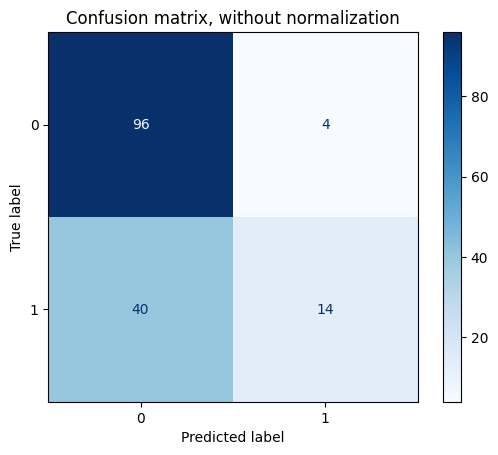

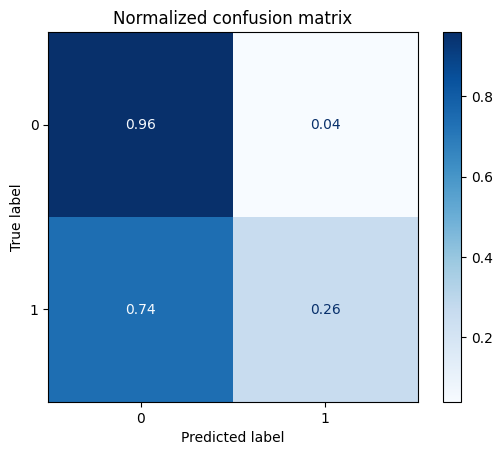

Confusion matrix, without normalization
[[95  5]
 [37 17]]
Normalized confusion matrix
[[0.95       0.05      ]
 [0.68518519 0.31481481]]


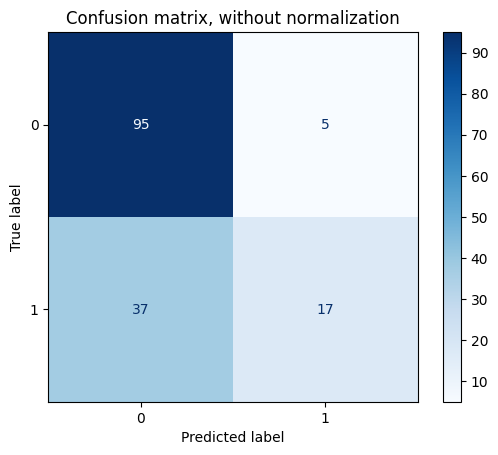

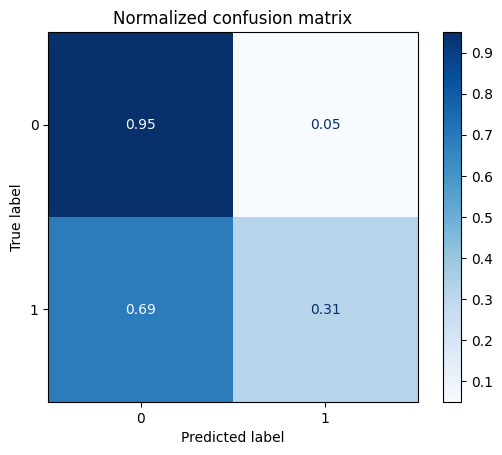

Confusion matrix, without normalization
[[97  3]
 [41 13]]
Normalized confusion matrix
[[0.97       0.03      ]
 [0.75925926 0.24074074]]


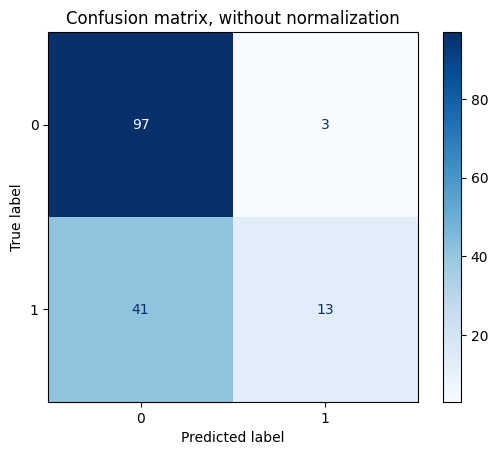

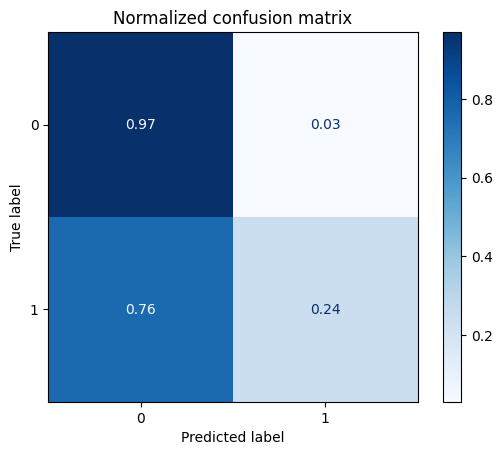

In [64]:
# Quiero la matriz de confusion de cada uno de los modelos
from sklearn.metrics import ConfusionMatrixDisplay
for name, model in models1:
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_Test,
                                                     #display_labels=y_test,
                                                     cmap=plt.cm.Blues,
                                                     normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()



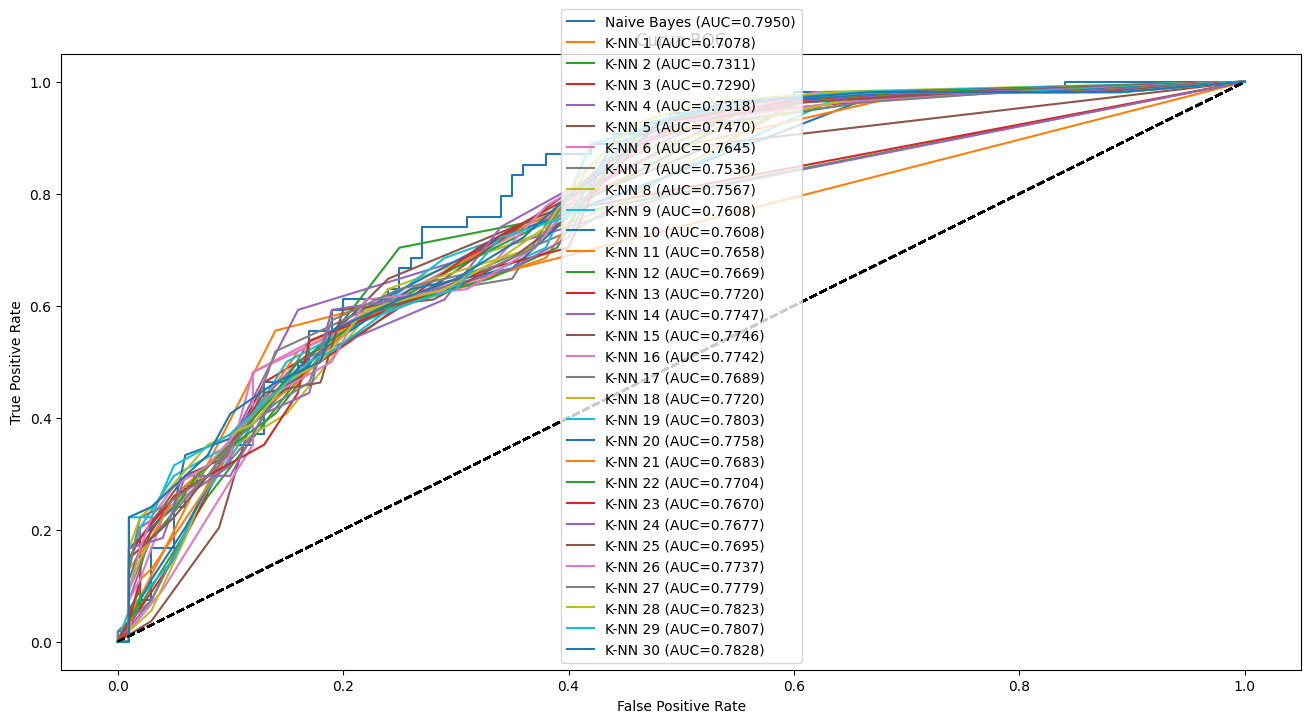

In [62]:

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

plt.figure(figsize=(16, 8))
for name, model in models1:
    model.fit(X_train, Y_train)
    Y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_Test, Y_pred)
    auc_score = roc_auc_score(Y_Test, Y_pred)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.legend()
    plt.title('Curva ROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plt.show()

